In [2]:
from google.colab import files
uploaded = files.upload()


Saving german.data-numeric to german.data-numeric


In [4]:
import pandas as pd

df = pd.read_csv("german.data-numeric",
                 sep=r"\s+",
                 header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [11]:
df.columns = [f"feature_{i}" for i in range(24)] + ["target"]
df.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [12]:
df["target"] = df["target"].map({1:0, 2:1})
df["target"].value_counts()


,count
target,
0,700
1,300


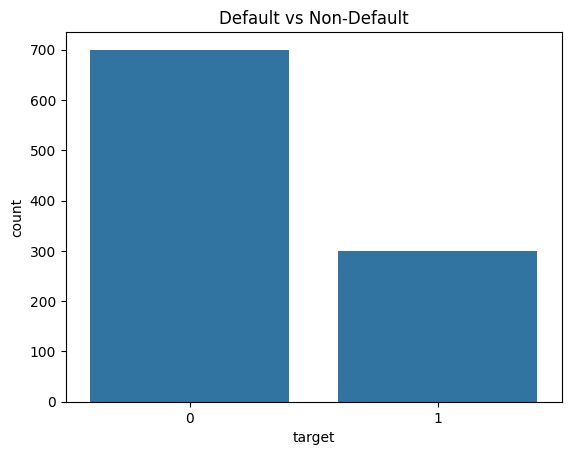

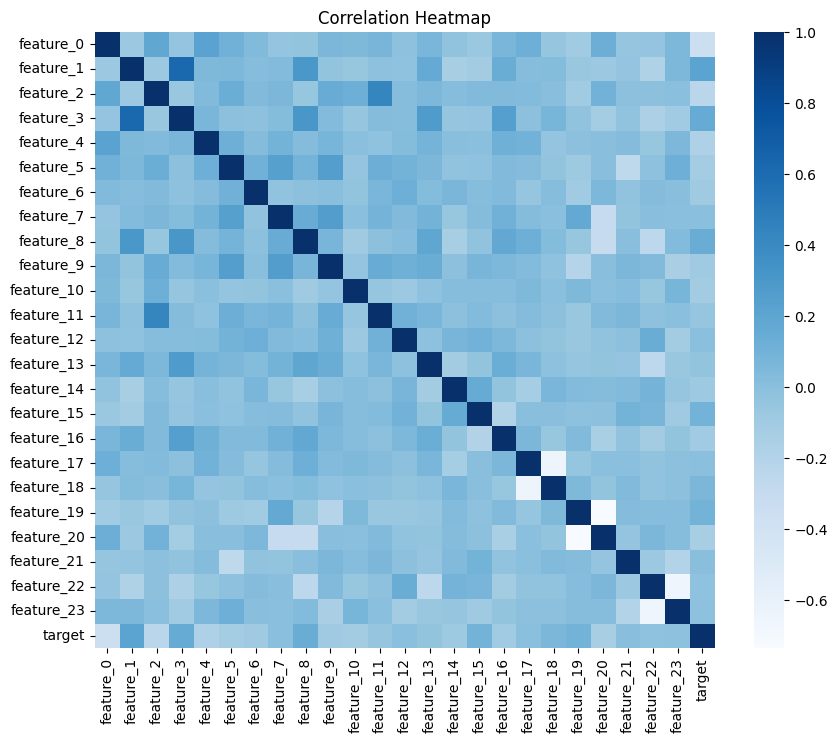

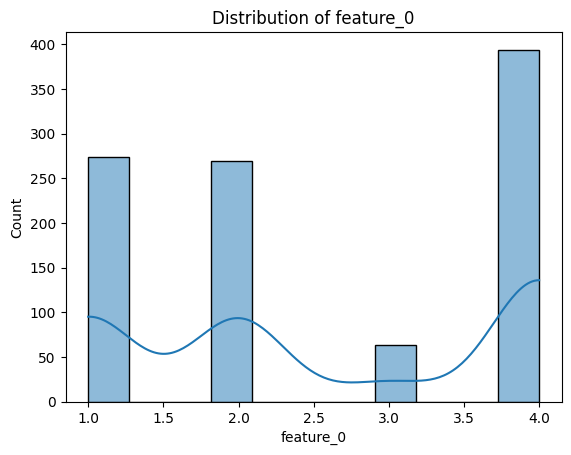

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class balance
sns.countplot(x=df["target"])
plt.title("Default vs Non-Default")
plt.show()

# Correlation heatmap (numeric dataset)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

# Example feature distribution
sns.histplot(df["feature_0"], kde=True)
plt.title("Distribution of feature_0")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)


In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        70
           1       0.73      0.53      0.62        30

    accuracy                           0.80       100
   macro avg       0.77      0.72      0.74       100
weighted avg       0.79      0.80      0.79       100



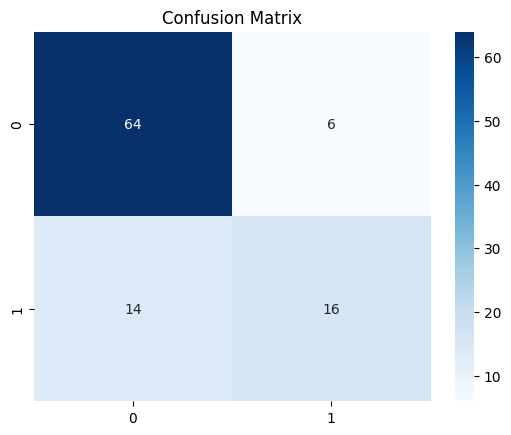

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()


In [17]:
import joblib
joblib.dump(model, "loan_default_model.pkl")


['loan_default_model.pkl']

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced", n_estimators=300)
rf.fit(X_train, y_train)

y_pred2 = rf.predict(X_test)

print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.82      0.96      0.88        70
           1       0.83      0.50      0.62        30

    accuracy                           0.82       100
   macro avg       0.83      0.73      0.75       100
weighted avg       0.82      0.82      0.80       100

